In [1]:
import os
import pandas as pd
import numpy as np
# import seaborn as sns
from glob import glob

import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
df1 = pd.DataFrame(data=np.random.randn(20,2), columns=['a', 'b'])
df2 = pd.DataFrame(data=np.random.randn(20,2), columns=['a', 'b'])
df = pd.concat([df1,df2], axis=0, names=['video', 'frame'], keys=['q', 'r'])
df.head()

a         b
video frame                    
q     0     -0.035059 -0.518209
      1     -1.149193  1.078885
      2     -1.505772  0.808598
      3      0.520043 -1.526223
      4     -1.410950 -0.838681

In [59]:
idx = df.index.values
idx

array([('q', 0), ('q', 1), ('q', 2), ('q', 3), ('q', 4), ('q', 5),
       ('q', 6), ('q', 7), ('q', 8), ('q', 9), ('q', 10), ('q', 11),
       ('q', 12), ('q', 13), ('q', 14), ('q', 15), ('q', 16), ('q', 17),
       ('q', 18), ('q', 19), ('r', 0), ('r', 1), ('r', 2), ('r', 3),
       ('r', 4), ('r', 5), ('r', 6), ('r', 7), ('r', 8), ('r', 9),
       ('r', 10), ('r', 11), ('r', 12), ('r', 13), ('r', 14), ('r', 15),
       ('r', 16), ('r', 17), ('r', 18), ('r', 19)], dtype=object)

In [69]:
dfout = df.copy()

for vid in dfout.index.get_level_values('video').unique():
    print vid

    idx = dfout.loc[[vid], :].loc[dfout.loc[[vid], 'a'] > 0].index.values
    
    K = idx.shape[0]
    N = 21
    N_tiles = int(N / K) - 1
    N_rem = N % K
    
    print N_tiles, N_rem

    idx2 = np.concatenate((np.tile(idx, N_tiles), np.random.choice(idx, N_rem)))

    dfrep = dfout.loc[idx2]
    maxf = dfout.loc[vid].index.get_level_values('frame').max() + 1
    dfrep = dfrep.reset_index('frame')
    dfrep['frame'] = np.arange(dfrep.shape[0]) + maxf
    dfrep = dfrep.set_index('frame', append=True)
    
    print dfrep
    
    dfout = dfout.append(dfrep).sortlevel(0)
    
    print dfout
    
print dfout

q
1 3
                    a         b
video frame                    
q     3      0.520043 -1.526223
      5      0.126613 -0.680650
      6      0.114597 -1.061853
      7      0.476934 -1.553555
      12     0.354527  0.619561
      13     0.471837  0.768734
      14     0.939717 -1.399951
      16     1.047766  1.092625
      17     0.915695  0.668246
      14     0.939717 -1.399951
      12     0.354527  0.619561
      17     0.915695  0.668246
20
                    a         b
video frame                    
q     20     0.520043 -1.526223
      21     0.126613 -0.680650
      22     0.114597 -1.061853
      23     0.476934 -1.553555
      24     0.354527  0.619561
      25     0.471837  0.768734
      26     0.939717 -1.399951
      27     1.047766  1.092625
      28     0.915695  0.668246
      29     0.939717 -1.399951
      30     0.354527  0.619561
      31     0.915695  0.668246
                    a         b
video frame                    
q     0     -0.035059 -0.518209

In [70]:
dfout

a         b
video frame                    
q     0     -0.035059 -0.518209
      1     -1.149193  1.078885
      2     -1.505772  0.808598
      3      0.520043 -1.526223
      4     -1.410950 -0.838681
      5      0.126613 -0.680650
      6      0.114597 -1.061853
      7      0.476934 -1.553555
      8     -0.705587 -2.667374
      9     -0.299147 -0.076034
      10    -0.184671  0.665963
      11    -0.302521 -0.507739
      12     0.354527  0.619561
      13     0.471837  0.768734
      14     0.939717 -1.399951
      15    -0.063812  0.364063
      16     1.047766  1.092625
      17     0.915695  0.668246
      18    -0.588349  0.451221
      19    -0.774959 -0.550212
      20     0.520043 -1.526223
      21     0.126613 -0.680650
      22     0.114597 -1.061853
      23     0.476934 -1.553555
      24     0.354527  0.619561
      25     0.471837  0.768734
      26     0.939717 -1.399951
      27     1.047766  1.092625
      28     0.915695  0.668246
      29     0.939717 -1.399951
      30     0.354527  0.619561
      31     0.915695  0.668246
r     0      0.092824 -1.036037
      1      1.343539  0.710178
      2      0.673128 -0.950624
      3      0.430867  0.080806
      4      0.160601 -0.410005
      5     -0.028809 -1.197984
      6      0.746118 -0.389281
      7      1.170361  1.115170
      8      0.973108  0.196756
      9     -0.553468  0.947156
      10     0.354333  0.690532
      11    -0.539211 -1.337146
      12    -0.611703  3.325755
      13    -0.419078  0.099856
      14     1.305951 -0.908223
      15    -0.168956 -0.575922
      16     0.736809 -0.314471
      17    -1.792006 -1.167777
      18     0.604155  0.303281
      19     0.666498 -0.035069
      20     1.170361  1.115170
      21     0.673128 -0.950624
      22     0.604155  0.303281
      23     0.430867  0.080806
      24     0.604155  0.303281
      25     0.736809 -0.314471
      26     0.746118 -0.389281
      27     1.343539  0.710178

In [41]:
def show2(img1, img2):
    fig, axs = plt.subplots(1, 2, figsize=(8,8))
    axs[0].imshow(img1, cmap='Greys_r')
    axs[0].axis('off')
    axs[1].imshow(img2, cmap='Greys_r')
    axs[1].axis('off');

In [97]:
def draw_flow(img, flow, step=8):
    h, w = img.shape[:2]
    y, x = np.mgrid[step/2:h:step, step/2:w:step].reshape(2,-1).astype(int)
    fx, fy = flow[y,x].T
    lines = np.vstack([x, y, x+fx, y+fy]).T.reshape(-1, 2, 2)
    lines = np.int32(lines + 0.5)
    vis = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    cv2.polylines(vis, lines, 0, (0, 255, 0))
    for (x1, y1), (x2, y2) in lines:
        cv2.circle(vis, (x1, y1), 1, (0, 255, 0), -1)
    return vis


def draw_hsv(flow):
    h, w = flow.shape[:2]
    fx, fy = flow[:,:,0], flow[:,:,1]
    ang = np.arctan2(fy, fx) + np.pi
    v = np.sqrt(fx*fx+fy*fy)
    hsv = np.zeros((h, w, 3), np.uint8)
    hsv[...,0] = ang*(180/np.pi/2)
    hsv[...,1] = 255
    hsv[...,2] = np.minimum(v*4, 255)
    bgr = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    return bgr

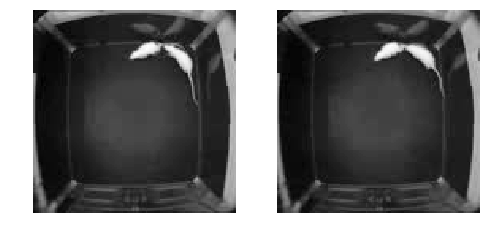

In [125]:
import cv2
dataset_root = '/home/malte/datasets/RatSI/video_frames_128x128/Observation01'
img_nr = np.random.randint(1, 22000)

img1 = cv2.imread(os.path.join(dataset_root, 'frame_{:08d}.jpg'.format(img_nr)), cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(os.path.join(dataset_root, 'frame_{:08d}.jpg'.format(img_nr+3)), cv2.IMREAD_GRAYSCALE)

show2(img1, img2)

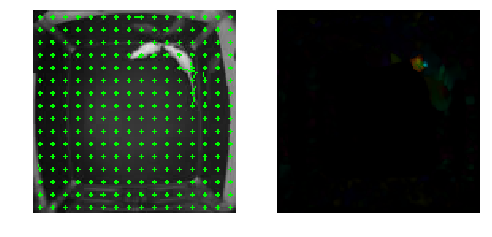

In [126]:
flow = cv2.calcOpticalFlowFarneback(img1, img2, None, 
                                    pyr_scale=.5, 
                                    levels=3, 
                                    iterations=20, 
                                    winsize=3, 
                                    poly_n=5, 
                                    poly_sigma=1.4, 
                                    flags=0)
hsv = draw_hsv(flow)
flow_vis = draw_flow(img1, flow)
show2(flow_vis, hsv)

In [32]:
videos = df.index.get_level_values('video').unique()
segment_length = 12

dfinterp = {}
for vid in videos:
    
    dftemp = df.loc[vid, :]
    dftemp = dftemp.reindex(range(dftemp.index.min(), dftemp.index.max() + segment_length - 1))
    dftemp = dftemp.interpolate() #fillna(method='ffill')
    dftemp = dftemp.rolling(segment_length, center=True, min_periods=1).mean()
    dfinterp[vid] = dftemp
    
dft = pd.concat(dfinterp, names=['video', 'frame']).sortlevel(0)

In [33]:
dft.head(20)

0         1         2         3         4    5    \
video         frame                                                          
Observation04 1      0.296101  0.169717  0.000000  1.287127  1.168929  0.0   
              2      0.300537  0.156662  0.000000  1.269186  1.135862  0.0   
              3      0.304974  0.143607  0.000000  1.251244  1.102794  0.0   
              4      0.309410  0.130552  0.000000  1.233303  1.069726  0.0   
              5      0.313846  0.117497  0.000000  1.215361  1.036658  0.0   
              6      0.319009  0.106815  0.000000  1.199362  0.998834  0.0   
              7      0.324717  0.097914  0.000000  1.184818  0.957442  0.0   
              8      0.335588  0.078331  0.000000  1.154275  0.878227  0.0   
              9      0.347124  0.060924  0.000000  1.125511  0.794651  0.0   
              10     0.359327  0.045693  0.000000  1.098527  0.706716  0.0   
              11     0.372195  0.032638  0.000000  1.073324  0.614421  0.0   
              12     0.383023  0.021759  0.000000  1.047678  0.526850  0.0   
              13     0.391811  0.013055  0.000000  1.021590  0.444005  0.0   
              14     0.398558  0.006528  0.000000  0.995060  0.365883  0.0   
              15     0.410884  0.002176  0.000000  0.973880  0.296650  0.0   
              16     0.428788  0.000000  0.000000  0.958050  0.236306  0.0   
              17     0.452270  0.000000  0.000000  0.947570  0.184850  0.0   
              18     0.470817  0.000000  0.000046  0.935763  0.142843  0.0   
              19     0.484427  0.000000  0.000138  0.922629  0.110286  0.0   
              20     0.493100  0.000000  0.000276  0.908169  0.087180  0.0   

                     6         7         8         9        ...       \
video         frame                                         ...        
Observation04 1      0.0  0.322996  0.000000  0.996919      ...        
              2      0.0  0.303300  0.000000  1.017955      ...        
              3      0.0  0.283604  0.000000  1.038991      ...        
              4      0.0  0.263908  0.000000  1.060027      ...        
              5      0.0  0.244212  0.000000  1.081063      ...        
              6      0.0  0.227083  0.000000  1.100407      ...        
              7      0.0  0.211878  0.000000  1.118483      ...        
              8      0.0  0.179545  0.000000  1.155903      ...        
              9      0.0  0.149564  0.000000  1.191773      ...        
              10     0.0  0.121936  0.000000  1.226092      ...        
              11     0.0  0.096661  0.000000  1.258861      ...        
              12     0.0  0.074669  0.000000  1.286637      ...        
              13     0.0  0.055959  0.000000  1.309421      ...        
              14     0.0  0.040532  0.000000  1.327212      ...        
              15     0.0  0.029763  0.000000  1.318631      ...        
              16     0.0  0.023651  0.000000  1.283677      ...        
              17     0.0  0.022197  0.000000  1.222352      ...        
              18     0.0  0.026240  0.005509  1.156101      ...        
              19     0.0  0.035781  0.016527  1.084925      ...        
              20     0.0  0.050819  0.033054  1.008825      ...        

                          246       247       248       249       250  \
video         frame                                                     
Observation04 1      0.976860  0.256615  1.164916  1.298837  0.000000   
              2      0.950765  0.248513  1.128149  1.287358  0.000000   
              3      0.924669  0.240410  1.091383  1.275879  0.000000   
              4      0.898574  0.232308  1.054617  1.264400  0.000000   
              5      0.872479  0.224205  1.017851  1.252921  0.000000   
              6      0.846984  0.215284  0.982445  1.240742  0.000581   
              7      0.821939  0.205748  0.948060  1.228039  0.001597   
              8      0.771400  0.187291  0.878270  1.203157  0.0031

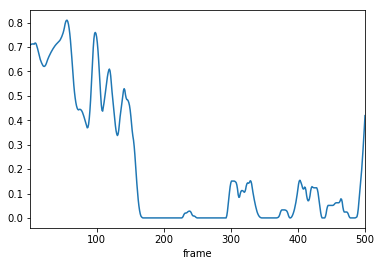

In [36]:
dft.loc[vid, 0].iloc[:500].plot()

In [ ]:
# output
videos = df.index.get_level_values('video').unique()
for vid in videos:
    df.loc[vid, :].to_hdf(os.path.join(output_path, '{}.h5'.format(vid)), key='features')

In [63]:
file_index = '/home/malte/rbr_cnn/rtracker_caffe/data/test.txt'
dfidx = pd.read_csv(file_index, sep=' ', header=None, names=['file'], usecols=[0])
dfidx['video'] = dfidx['file'].apply(lambda p: os.path.basename(os.path.dirname(p)))
dfidx['frame'] = dfidx['file'].apply(lambda p: int(os.path.splitext(os.path.basename(p))[0].split('_')[-1]))
dfidx = dfidx.drop('file', axis=1)

Index([u'0', u'1', u'2', u'3', u'4', u'5', u'6', u'7', u'8', u'9',
       ...
       u'246', u'247', u'248', u'249', u'250', u'251', u'252', u'253', u'254',
       u'255'],
      dtype='object', length=256)

In [10]:
# net = caffe.Net('/home/malte/rbr_cnn/rtracker_caffe/net/vgg_vidcaf_2stream/train_spatial_fusion.prototxt', caffe.TRAIN)
net = caffe.Net('/home/malte/rbr_cnn/rtracker_caffe/net/vidcaf_motion/extract_val.prototxt', caffe.TRAIN)

In [11]:
net.blobs['conv5a_squeezed'].data.shape

(100, 256, 13, 13)

In [4]:
print net.params['conv_spatial_fusion'][0].data.shape

(256, 1, 512, 1, 1, 1)


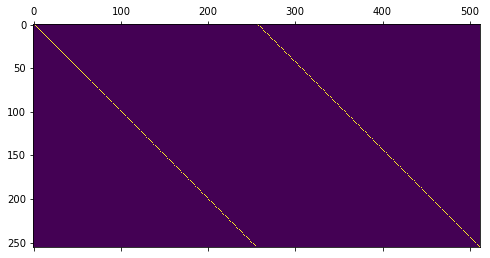

In [5]:
plt.matshow(np.squeeze(net.params['conv_spatial_fusion'][0].data))

In [83]:
images_path = '/home/malte/datasets/RatSI/box_frames_112'

videos = ['Observation01', 'Observation18', 'Observation04']
segment_length = 10

T = {}
for vid in videos:
    T[vid] = pd.read_csv(os.path.join(images_path, '{}.csv'.format(vid)), sep=';', index_col=0, names=['dist', 'rel_orientation', 'v0', 'v1'])
    T[vid] = T[vid].drop('rel_orientation', axis=1)
    T[vid].loc[:, ['v0', 'v1']] = T[vid].loc[:, ['v0', 'v1']].rolling(segment_length, min_periods=1, center=True).mean()
    Tdt = T[vid].diff().fillna(0)
    Tdt.columns = map(lambda c: c + '_dt', Tdt.columns)
    T[vid] = T[vid].join(Tdt)
    T[vid].loc[:, ['dist_dt', 'v0_dt', 'v1_dt']] = T[vid].loc[:, ['dist_dt', 'v0_dt', 'v1_dt']].rolling(segment_length, min_periods=1, center=True).mean()
    
    
T = pd.concat(T, names=['video', 'frame']).astype('f4')    

T_mean = T.loc[videos[0], :].mean(axis=0)
T_var  = T.loc[videos[0], :].var(axis=0)
T = (T - T_mean) / np.sqrt(T_var)

In [55]:
T.head()

dist        v0        v1   dist_dt     v0_dt  \
video         frame                                                     
Observation01 0      0.464951 -0.249379  1.054479 -0.603775  0.986129   
              1      0.457667 -0.109661  1.165084 -0.639883  0.814344   
              2      0.449659 -0.009863  1.363163 -0.699569  1.519768   
              3      0.430007  0.126425  1.355435 -0.714382  1.403365   
              4      0.406032  0.132064  1.307703 -0.747809  1.344114   

                        v1_dt  
video         frame            
Observation01 0      0.667556  
              1      0.554812  
              2      0.826717  
              3     -0.103985  
              4     -0.067185

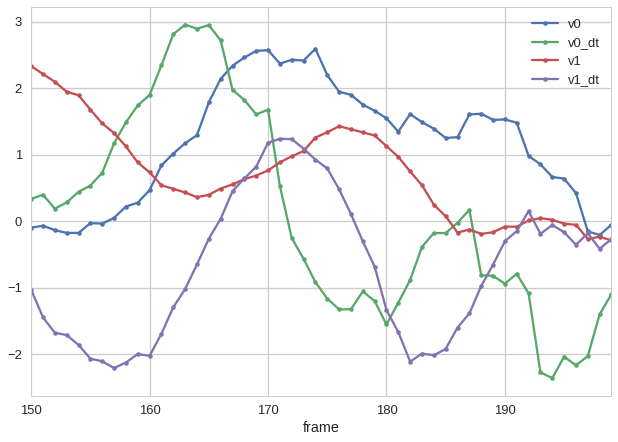

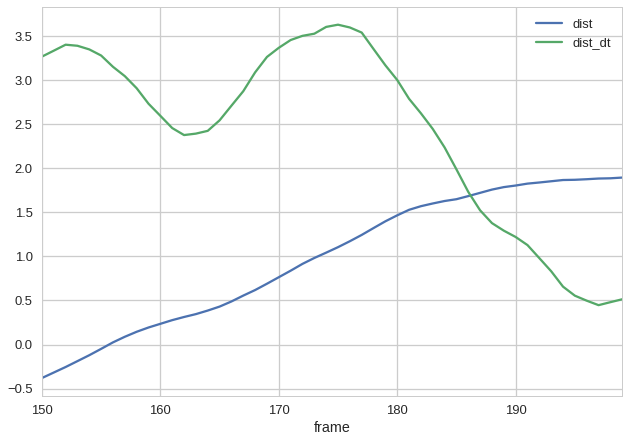

In [101]:
sns.set('talk', 'whitegrid')
t0 = 150
td = 50
T.loc['Observation01', ['v0', 'v0_dt', 'v1', 'v1_dt']].iloc[t0:t0+td].plot(marker='.')
T.loc['Observation01', ['dist', 'dist_dt']].iloc[t0:t0+td].plot()

In [118]:
from glob import glob
mean_files = glob(os.path.join(images_path, '*_mean.txt'))

mu = []
for fn in mean_files:
    with open(fn, 'rb') as fh:
        arstr = fh.readline().strip('[]')
        mu.append(np.asarray([float(s) for s in arstr.split(',')]))
mu = np.stack(mu)
mu = mu[:, :3]
print mu.mean()

51.7509111111
